# 環境構築



*   Pythonモジュールへのパス追加





In [1]:
!pwd

/mnt/MachineLearning


In [2]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [11]:
#読み込むデータのパスの設定

data_path = './data'
input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

input_list

['./data/office1/inputdata.csv',
 './data/office10/inputdata.csv',
 './data/office15/inputdata.csv',
 './data/office16/inputdata.csv',
 './data/office2/inputdata.csv',
 './data/office22/inputdata.csv',
 './data/office28/inputdata.csv',
 './data/office3/inputdata.csv',
 './data/office7/inputdata.csv']

In [14]:
#input(空調条件等)の読み込み
df_input = None

for input_fname in input_list:
    df_read = pd.read_csv(input_fname, index_col="case_name")
    if df_input is None:
        df_input = df_read
    else:
        df_input = pd.concat([df_input, df_read])

df_input

,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,2_z,...,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y
case_name,,,,,,,,,,,,,,,,,,,,,
office1_960_164_aout,960,164,a,4.760,2.18,1.255,180.0,3.285,3.160,1.255,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
office1_0_205_aout,0,205,a,4.760,2.18,1.255,180.0,3.285,3.160,1.255,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
office1_660_41_bout,660,41,b,4.760,2.18,1.255,180.0,3.285,3.160,1.255,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
office1_960_82_bout,960,82,b,4.760,2.18,1.255,180.0,3.285,3.160,1.255,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
office1_960_205_bout,960,205,b,4.760,2.18,1.255,180.0,3.285,3.160,1.255,...,1.255,90.0,2.885,1.241,1.255,90.0,6.0,5.5,3.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office7_960_82_bout,960,82,b,1.266,2.29,1.255,0.0,3.140,3.059,1.255,...,1.255,90.0,2.760,1.141,1.255,90.0,9.0,4.0,4.5,2.00
office7_660_0,660,0,off,1.266,2.29,1.255,0.0,3.140,3.059,1.255,...,1.255,90.0,2.760,1.141,1.255,90.0,9.0,4.0,4.5,2.00
office7_360_246_aout,360,246,a,1.266,2.29,1.255,0.0,3.140,3.059,1.255,...,1.255,90.0,2.760,1.141,1.255,90.0,9.0,4.0,4.5,2.00


In [15]:
#空調条件のみ抽出
df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

df_meta

,aircon,ventilation,exhaust
case_name,,,
office1_960_164_aout,960,164,a
office1_0_205_aout,0,205,a
office1_660_41_bout,660,41,b
office1_960_82_bout,960,82,b
office1_960_205_bout,960,205,b
...,...,...,...
office7_960_82_bout,960,82,b
office7_660_0,660,0,off
office7_360_246_aout,360,246,a


In [16]:
#排気口位置a,b,offをダミー変数化

df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# dummies = pd.get_dummies(df_input['exhaust'])
# df_input.drop("exhaust", axis=1, inplace=True)
# df_input = pd.concat([df_input, dummies], axis=1)
# df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
#           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
#           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
#           ,"aircon_position_x","aircon_position_y"])

df_meta

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office1_960_164_aout,960,164,1,0,0
office1_0_205_aout,0,205,1,0,0
office1_660_41_bout,660,41,0,1,0
office1_960_82_bout,960,82,0,1,0
office1_960_205_bout,960,205,0,1,0
...,...,...,...,...,...
office7_960_82_bout,960,82,0,1,0
office7_660_0,660,0,0,0,1
office7_360_246_aout,360,246,1,0,0


In [18]:
df_count = pd.read_csv("./CountResults/sitting/count_from2sec_patientAverage.csv", index_col="casename")

df_count

,num_drop,volume[ml],RoI
casename,,,
office2_0_0,6739.4,0.000067,204.224242
office2_0_164_aout,7865.4,0.000063,238.345455
office2_0_164_bout,6049.8,0.000062,183.327273
office2_0_246_aout,7934.4,0.000050,240.436364
office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...
office3_960_164_bout,5117.4,0.000075,155.072727
office3_960_246_aout,4428.0,0.000073,134.181818
office3_960_246_bout,3890.0,0.000066,117.878788


In [19]:
# df_meta.join(df_count)
df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

df_total

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,num_drop,volume[ml],RoI
office1_960_164_aout,960,164,1,0,0,5203.0,0.000049,157.666667
office1_0_205_aout,0,205,1,0,0,7809.8,0.000076,236.660606
office1_660_41_bout,660,41,0,1,0,5928.6,0.000046,179.654545
office1_960_82_bout,960,82,0,1,0,6454.6,0.000083,195.593939
office1_960_205_bout,960,205,0,1,0,5522.4,0.000056,167.345455
...,...,...,...,...,...,...,...,...
office7_960_82_bout,960,82,0,1,0,7550.2,0.000107,209.727778
office7_660_0,660,0,0,0,1,6621.8,0.000080,183.938889
office7_360_246_aout,360,246,1,0,0,6474.2,0.000081,179.838889
office7_960_0,960,0,0,0,1,7348.4,0.000095,204.122222


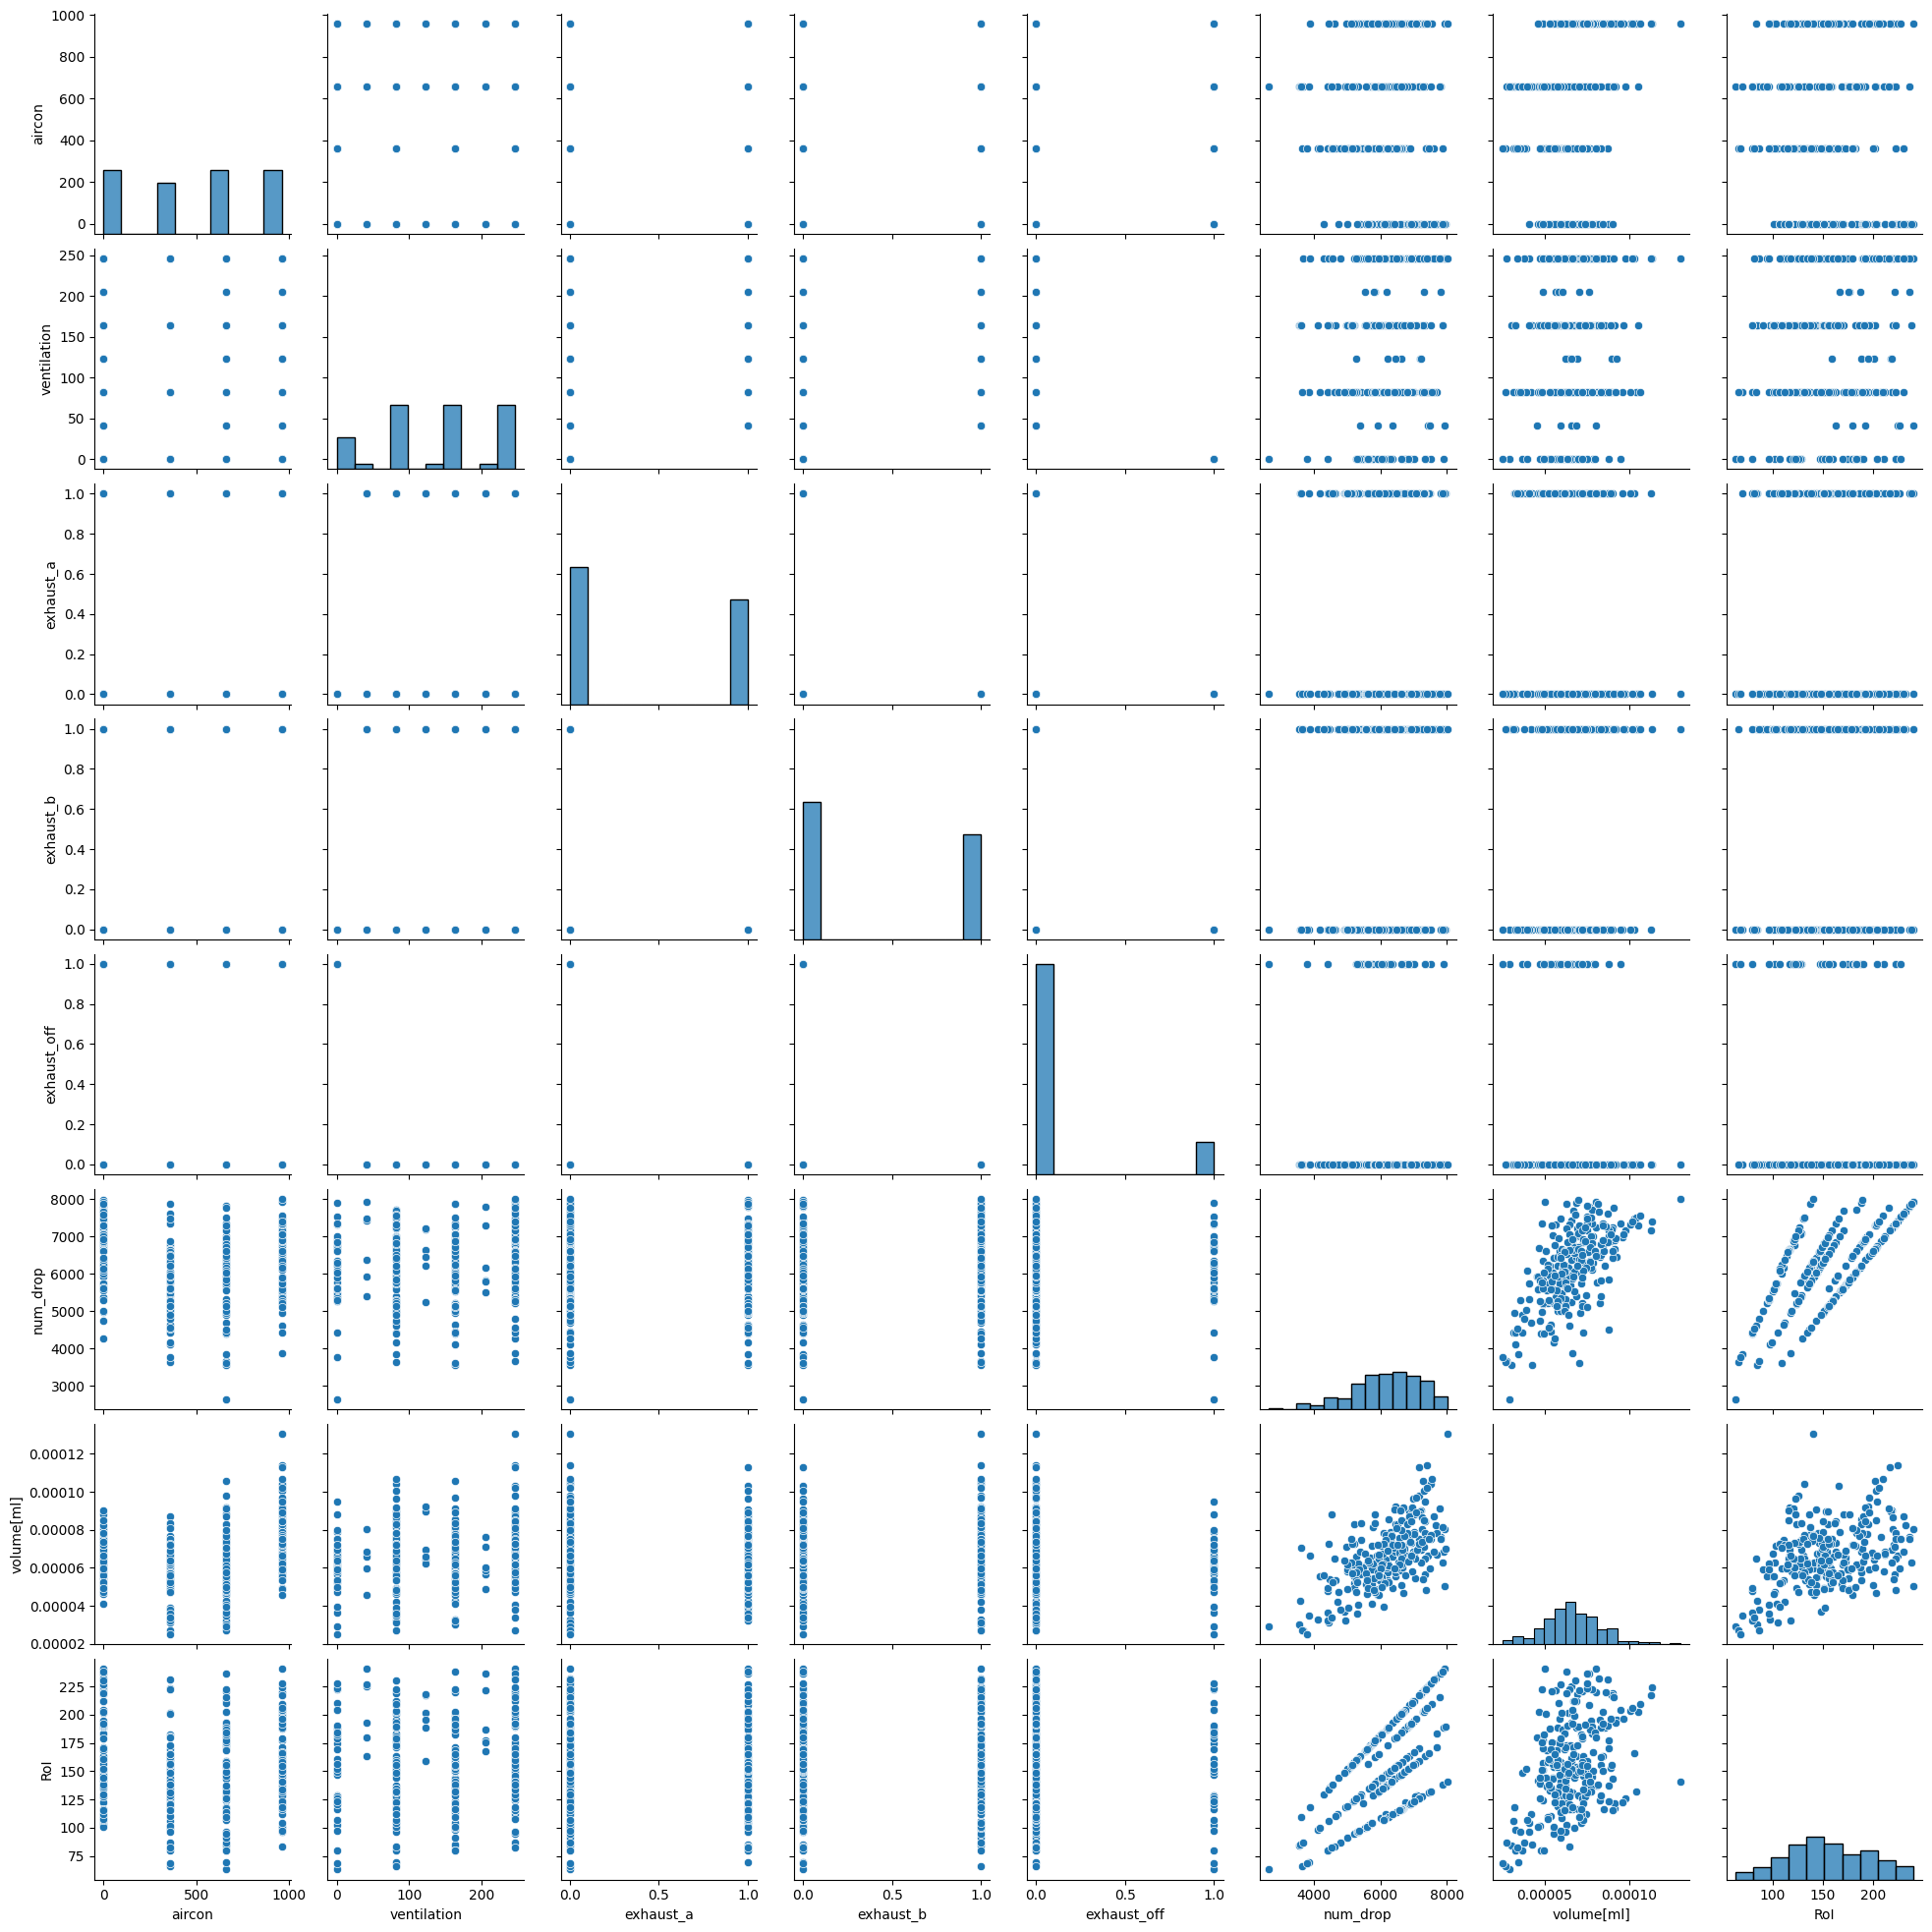

In [22]:
import seaborn as sns

sns.pairplot(df_total)

In [23]:
from sklearn import preprocessing

#入力データの標準化
stdscaler = preprocessing.StandardScaler()
stdscaler.fit(df_total)
df_total_tf = stdscaler.transform(df_total)

df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_total_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,num_drop,volume[ml],RoI
office1_960_164_aout,1.261546,0.294952,1.143249,-0.874700,-0.391802,-0.950160,-1.018438,0.057732
office1_0_205_aout,-1.380856,0.785916,1.143249,-0.874700,-0.391802,1.621106,0.595029,1.999648
office1_660_41_bout,0.435795,-1.177940,-0.874700,1.143249,-0.391802,-0.234450,-1.226587,0.598262
office1_960_82_bout,1.261546,-0.686976,-0.874700,1.143249,-0.391802,0.284379,0.977896,0.990102
office1_960_205_bout,1.261546,0.785916,-0.874700,1.143249,-0.391802,-0.635113,-0.585326,0.295666
...,...,...,...,...,...,...,...,...
office7_960_82_bout,1.261546,-0.686976,-0.874700,1.143249,-0.391802,1.365045,2.398745,1.337555
office7_660_0,0.435795,-1.668904,-0.874700,-0.874700,2.552310,0.449300,0.818117,0.703584
office7_360_246_aout,-0.389955,1.276880,1.143249,-0.874700,-0.391802,0.303712,0.859225,0.602794
office7_960_0,1.261546,-1.668904,-0.874700,-0.874700,2.552310,1.165996,1.690738,1.199753


In [24]:
df_meta_standardized = df_total_standardized[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]

df_RoI_standardized = df_total_standardized["RoI"]

In [ ]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

{'office2': array([[2.832 , 4.588 , 1.263 ],
        [3.1   , 1.55  , 0.4833],
        [2.709 , 3.093 , 1.244 ],
        ...,
        [2.759 , 3.36  , 0.48  ],
        [4.88  , 2.81  , 1.264 ],
        [4.204 , 1.661 , 0.75  ]], dtype=float32),
 'office1': array([[1.107 , 2.073 , 0.7   ],
        [3.351 , 3.223 , 1.347 ],
        [3.775 , 2.427 , 0.5866],
        ...,
        [3.429 , 2.181 , 0.    ],
        [2.571 , 2.373 , 0.05  ],
        [3.251 , 3.485 , 0.8337]], dtype=float32),
 'office16': array([[6.079 , 3.707 , 1.014 ],
        [2.294 , 5.    , 2.212 ],
        [5.793 , 1.455 , 1.233 ],
        ...,
        [3.407 , 0.6372, 0.    ],
        [4.553 , 1.361 , 1.168 ],
        [6.197 , 3.81  , 0.5341]], dtype=float32),
 'office22': array([[3.693 , 3.918 , 0.1951],
        [5.5   , 2.623 , 0.3624],
        [5.201 , 4.189 , 0.8347],
        ...,
        [5.507 , 2.542 , 0.4169],
        [4.744 , 2.955 , 0.7   ],
        [2.534 , 3.035 , 0.    ]], dtype=float32),
 'office7': array(

In [30]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。
"""
officemodel_path = 'OfficeModel/model_origin'
# office_list = os.listdir(officemodel_path)
case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

sampledPointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        

    pc_aircon = pc_dict[OfficePart.aircon]
    pc_airvent = pc_dict[OfficePart.airvent]
    pc_room = pc_dict[OfficePart.room]
    pc_base = np.concatenate([pc_aircon, pc_airvent, pc_room])
    num_sampling = NUM_POINTS - len(pc_base)

#     pc_forSampling = np.concatenate([pc_dict[OfficePart.body], pc_dict[OfficePart.desks]])
# #     pc_forSampling = pc_dict[OfficePart.desks]
#     print(f'#sampling {num_sampling} from {len(pc_forSampling)}', )
#     rand_list = random.sample(range(len(pc_forSampling)), k=num_sampling)
#     pc_sampled = pc_forSampling[rand_list, :]
    
    num_sampling_body = num_sampling // 2
    num_sampling_desks = num_sampling - num_sampling_body
    
    print("num_sampling_body = ", num_sampling_body)
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=num_sampling_body)
    pc_sampled_body = pc_body[rand_list, :]
    
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    
    
#     pointCloud = np.concatenate([pc_base, pc_sampled])
    pointCloud = np.concatenate([pc_base, pc_sampled_body, pc_sampled_desks])
    print(pointCloud.shape)
    sampledPointCloud_dict[officename] = pointCloud


OfficePart.aircon
OfficePart.airvent
OfficePart.body
OfficePart.room
OfficePart.desks
['OfficeModel/model_origin/case1/aircon/aircon_body.stl', 'OfficeModel/model_origin/case1/aircon/aircon_inlets.stl', 'OfficeModel/model_origin/case1/aircon/aircon_outlet.stl']
['OfficeModel/model_origin/case1/airvent/20210812_airvent_a.stl', 'OfficeModel/model_origin/case1/airvent/airvent_b.stl']
['OfficeModel/model_origin/case1/body/20210810_bodies.stl']
['OfficeModel/model_origin/case1/room/20210810_office_bottom.stl', 'OfficeModel/model_origin/case1/room/20210810_office_side1.stl', 'OfficeModel/model_origin/case1/room/20210810_office_side2.stl', 'OfficeModel/model_origin/case1/room/20210810_office_side3.stl', 'OfficeModel/model_origin/case1/room/20210810_office_top.stl', 'OfficeModel/model_origin/case1/room/20210812_office_side4.stl']
['OfficeModel/model_origin/case1/desks/20210810_desks.stl']
num_sampling_body =  720
num_sampling_desks =  720
(2048, 3)
['OfficeModel/model_origin/case10/aircon/2021

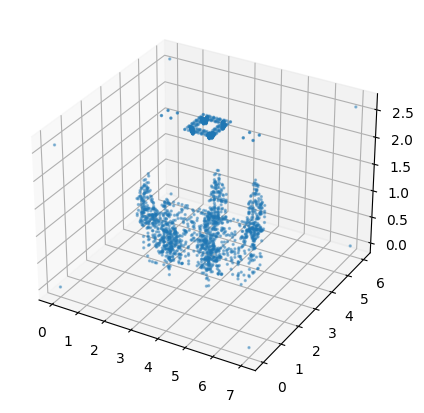

In [31]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(sampledPointCloud_dict['office10'])

In [32]:
import numpy as np
'''
点群シャッフルによるデータ増強
'''
rng = np.random.default_rng()

pointCloud_augumented_dict = {}
for office_name, pointCloud in sampledPointCloud_dict.items():
    pc_list = []
    for i in range(4):
        pc = pointCloud.copy()

        if i >= 1:
            #点群のシャッフル
            rng.shuffle(pc)

        pc_list.append(pc)

    pointCloud_augumented_dict[office_name] = pc_list

pointCloud_augumented_dict

{'office1': [array([[2.5   , 2.25  , 2.6   ],
         [2.5   , 2.375 , 2.6   ],
         [2.5   , 2.45  , 2.6   ],
         ...,
         [1.925 , 1.525 , 0.5375],
         [3.3   , 3.25  , 0.05  ],
         [2.035 , 3.485 , 0.96  ]], dtype=float32),
  array([[2.583533 , 3.05     , 2.566467 ],
         [3.3      , 3.133533 , 2.566467 ],
         [2.035488 , 3.254372 , 1.09709  ],
         ...,
         [1.925    , 1.741667 , 0.05     ],
         [3.3      , 2.3503   , 2.5497   ],
         [3.825    , 1.5      , 0.2833333]], dtype=float32),
  array([[4.656392 , 2.240756 , 0.7325774],
         [2.6003   , 3.05     , 2.5497   ],
         [3.3      , 2.4      , 2.5375   ],
         ...,
         [1.263256 , 1.234858 , 0.8361718],
         [3.35     , 2.45     , 2.566467 ],
         [1.607448 , 1.022934 , 1.12066  ]], dtype=float32),
  array([[2.85     , 1.15     , 0.265    ],
         [3.725    , 2.225    , 0.2833333],
         [2.566167 , 3.05     , 2.6      ],
         ...,
         [2.

In [33]:
'''
点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
'''
case_index_list = list(df_total.index)


case_index_augumented_list = []

pointCloudArray_list = []
metaArray_list = []

RoI_list = []

for case_index in case_index_list:
    office_name = case_index.split('_', maxsplit=1)[0]
    pc_list = pointCloud_augumented_dict[office_name]
    for augumentID, pointCloud in enumerate(pc_list):
        case_index_augumented_list.append(case_index + '-' + str(augumentID))
        pointCloudArray_list.append(pointCloud)
        metaArray_list.append(df_meta_standardized.loc[case_index])
        RoI_list.append(df_RoI_standardized.loc[case_index])

case_index_array = np.array(case_index_augumented_list)
pointCloudArray = np.array(pointCloudArray_list)
metaArray = np.array(metaArray_list)
RoIArray = np.array(RoI_list)


In [34]:
print(case_index_array.shape)

print(pointCloudArray.shape)
print(metaArray.shape)

print(RoIArray.shape)

(1052,)
(1052, 2048, 3)
(1052, 5)
(1052,)


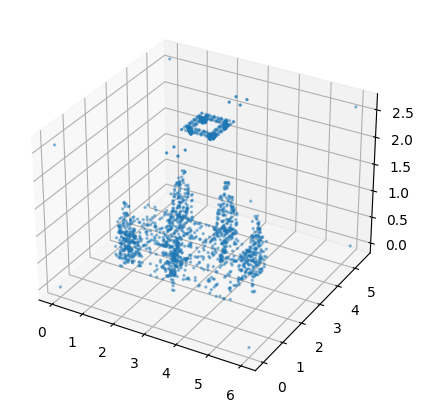

In [35]:
plot3d_points(pointCloudArray[0, :,:])

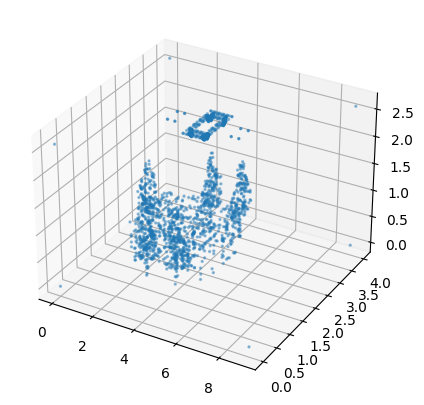

In [36]:
plot3d_points(sampledPointCloud_dict["office7"])

# モデル実装

In [37]:
import IPython
import keras_tuner as kt

In [38]:
from tensorflow import keras
from PointNet import conv_bn, dense_bn


def permutation_invariant_network_builder(hp, inputs):
    """
    順序不変性（PointNetからtnetを除去したもの）モデルビルダー関数

    ハイパーパラメータを引数にとる（チューニング用）
    """

    x = inputs
    
    hp_conv_layers_1 = hp.Int('conv_bn_layers', min_value = 1, max_value = 4, step = 1)
    for i in range(hp_conv_layers_1):
        hp_filters = hp.Int(f'filters_bn-{i}', min_value = 32, max_value = 512, step = 32)
        x = conv_bn(x, hp_filters)
    
    x = keras.layers.GlobalMaxPooling1D()(x)
    
    # Tune the dropout rate for the optimizer 
    # hp_dropout_rate = hp.Choice('dropout_rate', values = [0.3, 0.5, 0.9])
    
    hp_dense_layers = hp.Int('dense_bn_layers', min_value = 0, max_value = 4, step = 1)
    for i in range(hp_dense_layers):
        hp_units = hp.Int(f'units_bn_{i}', min_value = 32, max_value = 512, step = 32)
        x = dense_bn(x, hp_units)
        # x = keras.layers.Dropout(hp_dropout_rate)(x)

    hp_features = hp.Int('features', min_value = 4, max_value = 64, step = 4)
    features = keras.layers.Dense(hp_features, activation="softmax")(x)


    return features


In [39]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from keras.layers.convolutional import Conv2DTranspose, Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from keras.layers import LeakyReLU

In [40]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9622499177811939915
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9833938944
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10190316827539546501
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-10-09 03:32:41.224115: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-09 03:32:41.708383: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9378 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [42]:
NUM_POINTS = pointCloudArray.shape[1]

def total_model_builder(hp):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、
    転置畳み込みで感染リスク分布を出力する。

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    input_pointCloud = keras.Input(shape=(NUM_POINTS, 3), name='pointCloud')
    input_meta = keras.Input(shape=(metaArray.shape[1], ), name='meta')

    features_pc = permutation_invariant_network_builder(hp, input_pointCloud)
    
    features = keras.layers.Concatenate()([features_pc, input_meta])

    x = features
    
    hp_dense_layers = hp.Int('dense_layers', min_value = 0, max_value = 4, step = 1)
    for i in range(hp_dense_layers):
        hp_units = hp.Int(f'units-{i}', min_value = 32, max_value = 512, step = 32)
        x = keras.layers.Dense(hp_units)(x)
        x = LeakyReLU()(x)
    
    outputs = keras.layers.Dense(1)(x)

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    model = keras.Model(inputs=[input_pointCloud, input_meta], outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model



# チューニング

In [45]:
'''
特定のofficeだけ、テスト用にとっておく。
学習にも、チューニング中の検証にも使わない。
'''

office_for_test = 'office10'
fit_ID = []
test_ID = []

for (ID, case_index) in enumerate(case_index_augumented_list):
    if office_for_test + '_' not in case_index:
        fit_ID.append(ID)
    else:
        test_ID.append(ID)

print(case_index_array[test_ID])
        
case_index_fit = case_index_array[fit_ID]
X_pc_fit = pointCloudArray[fit_ID]
X_meta_fit = metaArray[fit_ID]
y_fit = RoIArray[fit_ID]

case_index_test = case_index_array[test_ID]
X_pc_test = pointCloudArray[test_ID]
X_meta_test = metaArray[test_ID]
y_test = RoIArray[test_ID]

['office10_360_164_bout-0' 'office10_360_164_bout-1'
 'office10_360_164_bout-2' 'office10_360_164_bout-3'
 'office10_660_246_aout-0' 'office10_660_246_aout-1'
 'office10_660_246_aout-2' 'office10_660_246_aout-3'
 'office10_660_82_bout-0' 'office10_660_82_bout-1'
 'office10_660_82_bout-2' 'office10_660_82_bout-3'
 'office10_660_82_aout-0' 'office10_660_82_aout-1'
 'office10_660_82_aout-2' 'office10_660_82_aout-3'
 'office10_660_164_bout-0' 'office10_660_164_bout-1'
 'office10_660_164_bout-2' 'office10_660_164_bout-3'
 'office10_0_164_aout-0' 'office10_0_164_aout-1' 'office10_0_164_aout-2'
 'office10_0_164_aout-3' 'office10_0_82_aout-0' 'office10_0_82_aout-1'
 'office10_0_82_aout-2' 'office10_0_82_aout-3' 'office10_660_164_aout-0'
 'office10_660_164_aout-1' 'office10_660_164_aout-2'
 'office10_660_164_aout-3' 'office10_660_246_bout-0'
 'office10_660_246_bout-1' 'office10_660_246_bout-2'
 'office10_660_246_bout-3' 'office10_360_246_bout-0'
 'office10_360_246_bout-1' 'office10_360_246_bout

In [46]:
from k_cross_split import get_k_cross_ID_list

'''
チューニングに使うデータを，学習用と検証用に分ける
'''

data_size = len(X_pc_fit)
k = 4
print('data_size =', data_size)
print('k =', k)

#k分割交差検証用の関数だが、ここでは単に訓練データと検証データの分割目的で使う
k_cross_ID_list = get_k_cross_ID_list(data_size, k)

(train_ID, val_ID) = k_cross_ID_list[0]
print(train_ID)
print(val_ID)

X_pc_train = X_pc_fit[train_ID]
X_meta_train = X_meta_fit[train_ID]
y_train = y_fit[train_ID]

X_pc_val = X_pc_fit[val_ID]
X_meta_val = X_meta_fit[val_ID]
y_val = y_fit[val_ID]

data_size = 940
k = 4
[663, 878, 815, 639, 265, 211, 740, 269, 141, 361, 338, 592, 419, 256, 251, 712, 48, 242, 176, 56, 585, 222, 861, 603, 24, 612, 645, 634, 54, 2, 935, 903, 312, 300, 145, 766, 445, 172, 385, 326, 549, 98, 78, 770, 129, 204, 891, 736, 36, 232, 71, 551, 911, 909, 541, 283, 567, 152, 787, 565, 488, 610, 455, 865, 399, 426, 618, 266, 383, 582, 346, 714, 862, 826, 116, 561, 514, 150, 50, 473, 349, 882, 446, 726, 771, 627, 16, 711, 12, 606, 182, 96, 872, 613, 584, 294, 774, 371, 902, 365, 321, 619, 719, 69, 643, 418, 376, 10, 554, 325, 745, 661, 540, 708, 79, 574, 591, 47, 0, 478, 227, 682, 189, 500, 532, 577, 508, 32, 480, 547, 479, 786, 895, 925, 658, 747, 65, 798, 789, 494, 594, 568, 262, 268, 94, 772, 409, 415, 519, 397, 885, 650, 276, 185, 733, 680, 469, 470, 241, 576, 534, 3, 393, 342, 438, 506, 430, 153, 64, 120, 63, 7, 8, 706, 166, 485, 570, 235, 797, 390, 309, 836, 6, 332, 395, 151, 630, 575, 386, 277, 717, 5, 822, 907, 296, 775, 780, 810, 27, 449, 315, 493, 327

In [70]:
import shutil
import datetime

# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)

projectName = 'trial' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# projectName = "trial20221004-023343"
print("projectName : " + projectName)

output_dir = './KerasTuner_log'

# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)

tuner = kt.Hyperband(total_model_builder,
                     objective = 'val_loss', 
                     max_epochs = 1000,
                    #  factor = 3,
                     directory = output_dir,
                     project_name = projectName
                     )


projectName : trial20221010-015222


In [71]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# logdir = os.path.join("tblogs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_cb = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

estop_tuning =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100)


In [47]:
# case_index_train = case_index_array[train_ID]
# case_index_test = case_index_array[test_ID]

In [48]:
# tuner.search({'pointCloud':X_pc_train, 'meta':X_meta_train}, Y_train,
#              epochs = 40,
#              validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, Y_test),
#              callbacks = [ClearTrainingOutput()])

In [72]:
tuner.search({'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
             epochs = 1000,
             validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
             # callbacks = [tensorboard_cb, estop_tuning, ClearTrainingOutput()])
             callbacks = [estop_tuning, ClearTrainingOutput()])

Trial 2074 Complete [00h 01m 04s]
val_loss: 0.21982450783252716

Best val_loss So Far: 0.037046879529953
Total elapsed time: 05h 32m 53s
INFO:tensorflow:Oracle triggered exit


WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0385s vs `on_train_batch_end` time: 0.0630s). Check your callbacks.

In [ ]:
# function ClickConnect(){
#   console.log("60sごとに再接続");
#   document.querySelector("colab-connect-button").click()
# }
# setInterval(ClickConnect,1000*60);

In [73]:
tuner.results_summary()

Results summary
Results in ./KerasTuner_log/trial20221010-015222
Showing 10 best trials
Trial summary
Hyperparameters:
conv_bn_layers: 2
filters_bn-0: 96
dense_bn_layers: 1
features: 16
dense_layers: 3
learning_rate: 0.001
filters_bn-1: 288
units_bn_0: 128
units_bn_1: 352
units_bn_2: 224
units-0: 96
units-1: 224
units_bn_3: 416
filters_bn-2: 192
units-2: 416
units-3: 192
filters_bn-3: 320
tuner/epochs: 1000
tuner/initial_epoch: 334
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 1734
Score: 0.037046879529953
Trial summary
Hyperparameters:
conv_bn_layers: 2
filters_bn-0: 256
dense_bn_layers: 1
features: 20
dense_layers: 2
learning_rate: 0.001
filters_bn-1: 128
units_bn_0: 288
units_bn_1: 128
units_bn_2: 416
units-0: 224
units-1: 64
units_bn_3: 160
filters_bn-2: 96
units-2: 96
units-3: 480
filters_bn-3: 352
tuner/epochs: 1000
tuner/initial_epoch: 334
tuner/bracket: 6
tuner/round: 6
tuner/trial_id: 1247
Score: 0.043392714112997055
Trial summary
Hyperparameters:
conv_bn_layers: 4
filters_b

In [74]:
# Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
best_hps = tuner.get_best_hyperparameters()[0]

# best_conv_layers =best_hps.get('conv_bn_layers')
# print('best_conv_bn_layers = ', best_conv_layers)
# for i in range(best_conv_layers):
#     print(best_hps.get(f'filters_bn-{i}'))
    
# best_dense_layers =best_hps.get('dense_bn_layers')
# print('best_dense_layers = ', best_dense_layers)
# for i in range(best_dense_layers):
#     print(best_hps.get(f'units_bn_{i}'))

# print('best_features = ', best_hps.get('features'))
    
# print('best_learning_rate = ', best_hps.get('learning_rate'))

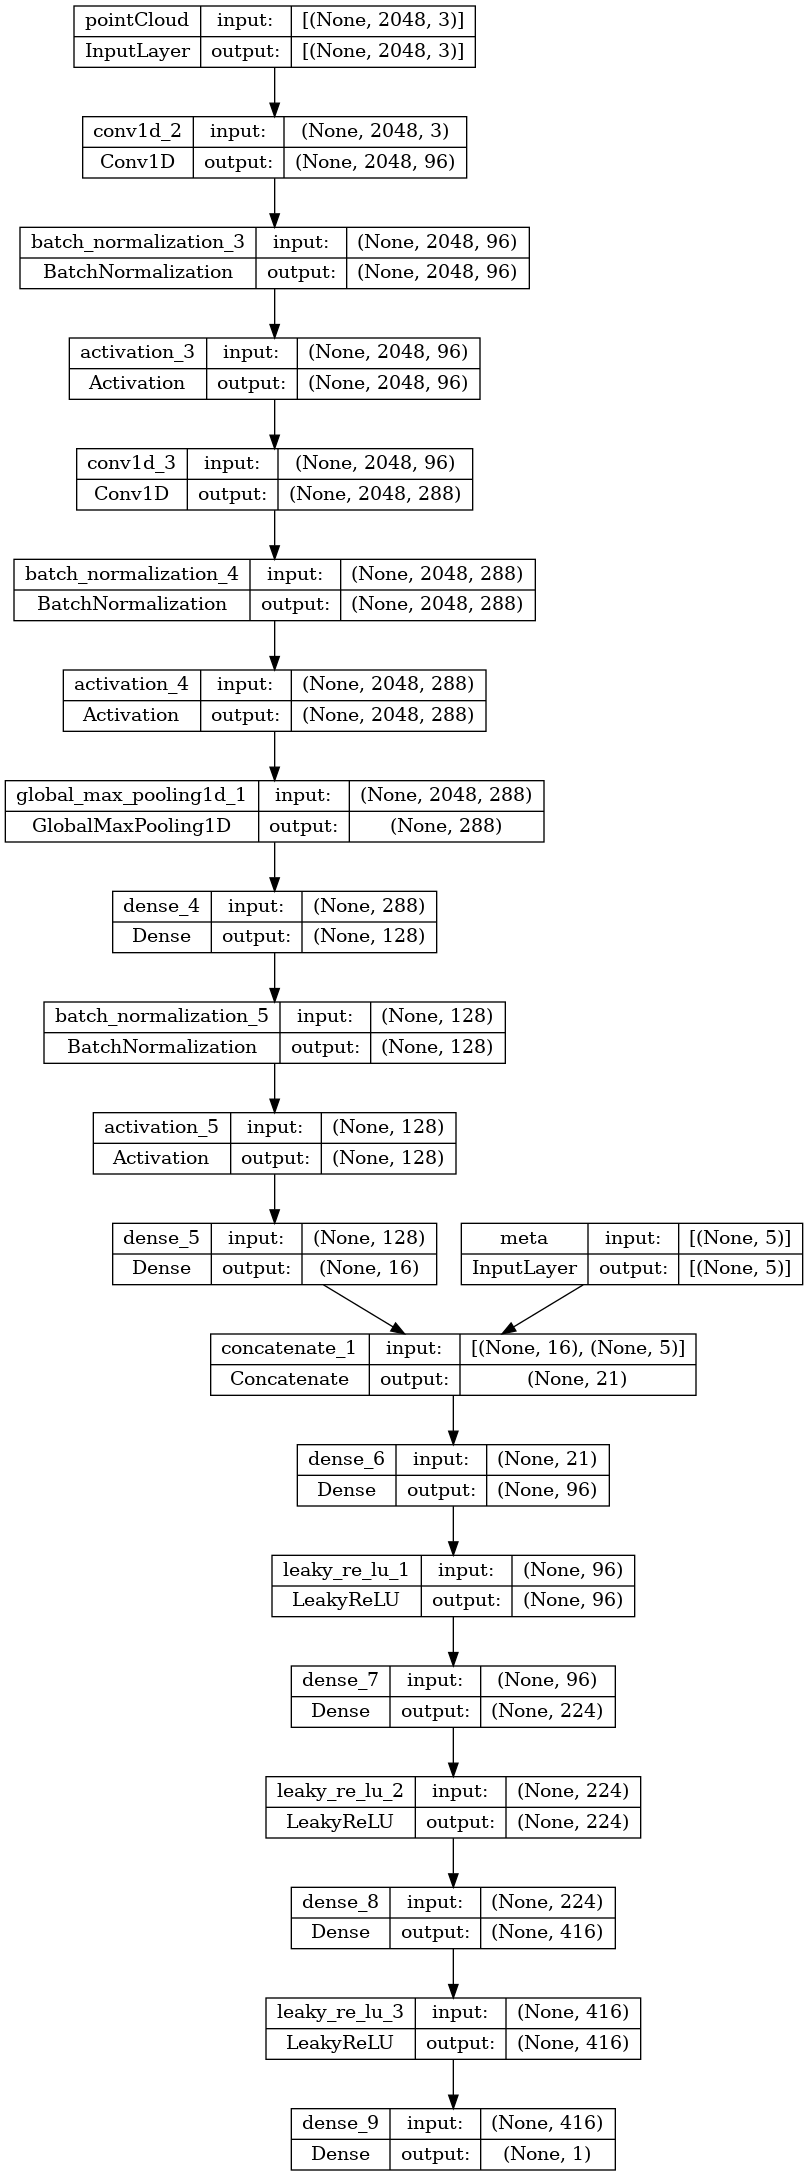

In [75]:
# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

keras.utils.plot_model(model, show_shapes=True)


In [76]:
from tensorflow.keras.callbacks import EarlyStopping

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100)

best_history = model.fit(
    {'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
    epochs = 1000,
    validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
    callbacks=[estop]
)

Epoch 1/1000
23/23 [==============================] - 2s 23ms/step - loss: 0.6309 - mae: 0.6210 - val_loss: 2.2285 - val_mae: 1.2210
Epoch 2/1000
23/23 [==============================] - 0s 15ms/step - loss: 0.3083 - mae: 0.4516 - val_loss: 2.2875 - val_mae: 1.2261
Epoch 3/1000
23/23 [==============================] - 0s 18ms/step - loss: 0.1971 - mae: 0.3530 - val_loss: 0.4859 - val_mae: 0.5279
Epoch 4/1000
23/23 [==============================] - 0s 14ms/step - loss: 0.1773 - mae: 0.3302 - val_loss: 0.9047 - val_mae: 0.7976
Epoch 5/1000
23/23 [==============================] - 0s 19ms/step - loss: 0.2425 - mae: 0.3861 - val_loss: 0.6496 - val_mae: 0.6358
Epoch 6/1000
23/23 [==============================] - 0s 14ms/step - loss: 0.1731 - mae: 0.3309 - val_loss: 0.2297 - val_mae: 0.3970
Epoch 7/1000
23/23 [==============================] - 0s 13ms/step - loss: 0.1542 - mae: 0.3147 - val_loss: 1.1870 - val_mae: 0.9232
Epoch 8/1000
23/23 [==============================] - 0s 13ms/step - 

# チューニング結果確認

In [77]:
import pandas as pd

def plot_history(history:dict):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    # plt.ylim(0., 5.)
    plt.show()

    acc_df = history_df[["mae", "val_mae"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("MeanAbsoluteError")
    plt.show()

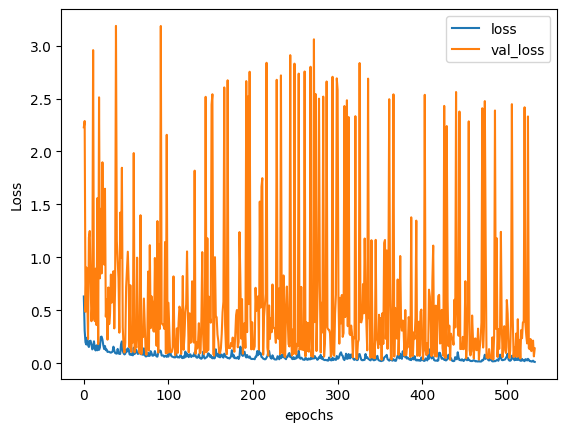

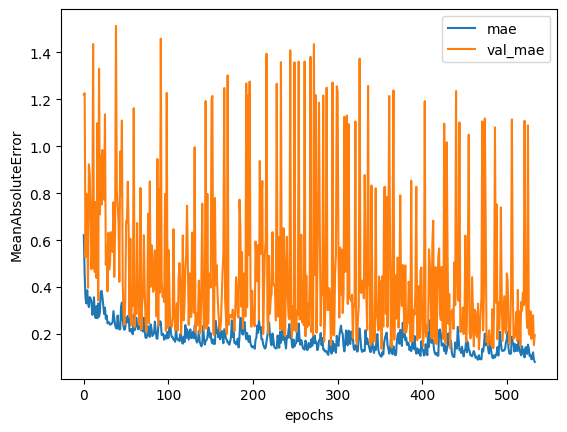

In [78]:
plot_history(best_history.history)

In [67]:
Y_train_pred = model.predict({'pointCloud':X_pc_train, 'meta':X_meta_train})
Y_test_pred = model.predict({'pointCloud':X_pc_test, 'meta':X_meta_test})

4/4 [==============================] - 0s 6ms/step


In [68]:
np.var(y_test)

0.588685784208906

In [69]:
test_mse, test_mae = model.evaluate({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test, verbose=0)

print(test_mse)

print(test_mae)

1.2118510007858276
0.8961325883865356


# いよいよ手詰まり状態

**残された手段**

*   点群データを調節
 *   現在、1点群あたりの点の数は2048個に統一
 *   点群データの作り方もいろいろある
 *   モデルから人体モデルだけ取り除く（現状、全点群のうち人体表面の頂点が多くを占める）
 *   エアコン・換気口を構成する頂点は必ずサンプリング 
*   点群を諦め、部屋のサイズを説明変数（入力）に加える
 *   ニューラルネットワークすらも諦め、重回帰へ（線形・非線形）
*   座っている位置と立っている位置とで観測飛沫数データを足し算した場合に分散は大きくなるだろうか（要確認）
* RNN
* 微分方程式を機械学習で解く
* 感染リスク定義見直し
* 分類問題へ
* 

いずれも大きな効果はあまり期待できそうにない・・・

